# Proyecto Final Inteligencia Artificial 
# Universidad del Valle 
### Presentado por:
### Samir Valencia - 1629607
### Cristian Manosalva - 1628397
A continuación se presenta el Notebook preparado para desarrollar diferentes sistemas de predicción para enfermedades cardiacas.

# Requerimientos
Para ejecutar el siguiente Notebook partimos de un punto base: Haber instalado Anaconda. Ya habiendo instalado Anaconda, procedemos a instalar algunas librerias adicionales que usaremos y no pertenecen a Anaconda, estas librerias se instalan a continuacion.

In [1]:
!pip install pydotplus
!pip install graphviz

A continuación, importamos las librerias que se usaran a lo largo de la implementación.

Cabe resaltar que se utiliza uno de los 'Magic' de Jupyter Notebooks para permitir graficas.

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
import graphviz
import pydotplus
import io
from sklearn.tree import export_graphviz
import sklearn.neural_network
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Cargar el DataFrame 
Para comenzar, cargaremos el Dataset propuesto para el proyecto en el cual la columna objetivo es target.
##### El Dataset se debe encontrar en la misma carpeta que el Notebook.

In [3]:
dataFrame=pd.read_csv("heart.csv")
df = pd.DataFrame(dataFrame)

Ahora podemos observar que el DataFrame se ha cargado correctamente

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Revisando los datos desde Kaggle, se observa que los datos estan completos pues al revisar en el formato "Column View" podemos ver que estan los 303 datos para todas las columnas. Además, lo confirmamos a continuación en donde se cuenta la cantidad de valores faltantes

In [6]:
print("La cantidad de valores faltantes es de: ",df.isnull().sum().sum())

La cantidad de valores faltantes es de:  0



Ahora dividimos las variables en grupos para graficarlas.
<br>
Nuestras variables numericas son:
<br>
1. age
<br>
2. trestbps
<br>
3. chol
<br>
4. thalach
<br>
5. oldpeak


Pues estas variables se caracterizan por ser continuas.


Nuestras variables categoricas son:
<br>
1. sex
<br>
2. cp
<br>
3. fbs
<br>
4. restecg
<br>
5. exang
<br>
6. slope
<br>
7. ca
<br>
8. thal
<br>
9. target
<br>
Ya que estas estan definidas en unos intervalos especificos.

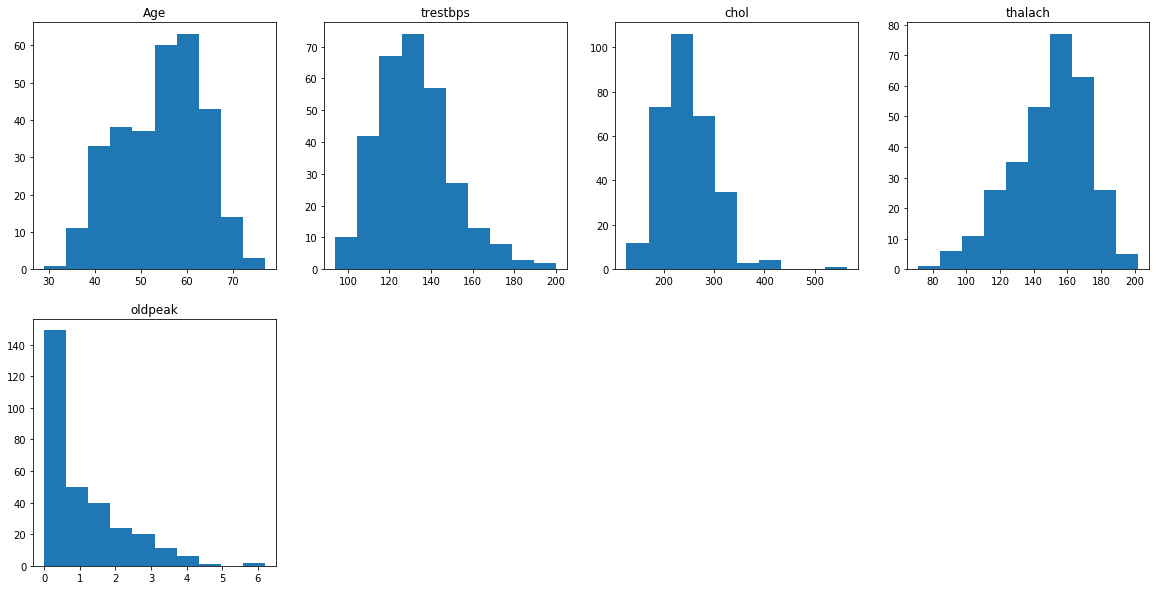

In [7]:
#Definimos las numericas 

fig1, num1 = np.histogram(df["age"])
fig2, num2 = np.histogram(df["trestbps"])
fig3, num3 = np.histogram(df["chol"])
fig4, num4 = np.histogram(df["thalach"])
fig5, num5 = np.histogram(df["oldpeak"])
plt.figure(figsize=(20,10))

plt.subplot(2, 4, 1)
plt.hist(num1[:-1], num1, weights=fig1)
plt.title('Age')
plt.ylabel('')

plt.subplot(2, 4, 2)
plt.hist(num2[:-1], num2, weights=fig2)
plt.title('trestbps')
plt.ylabel('')

plt.subplot(2, 4, 3)
plt.hist(num3[:-1], num3, weights=fig3)
plt.title('chol')
plt.ylabel('')

plt.subplot(2, 4, 4)
plt.hist(num4[:-1], num4, weights=fig4)
plt.title('thalach')
plt.ylabel('')

plt.subplot(2, 4, 5)
plt.hist(num5[:-1], num5, weights=fig5)
plt.title('oldpeak')
plt.ylabel('')
plt.show()


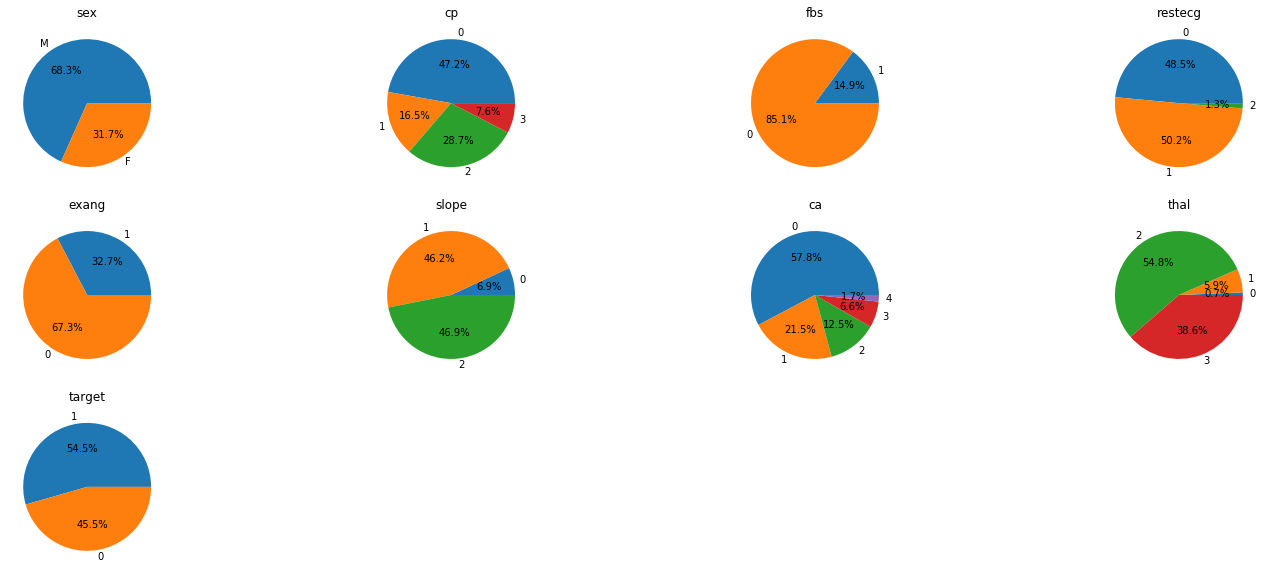

In [8]:

#Definimos las categoricas
f, ax = plt.subplots(1, 9, figsize = (25,10))
#sex
plt.subplot(3, 4, 1)
labels1 = ['M','F']
sexInf= [df.sex.sum(), df.sex.shape[0]- df.sex.sum()]
plt.pie(sexInf, labels=labels1, autopct='%1.1f%%')
plt.title('sex')

#cp
plt.subplot(3, 4, 2)
labels2 = ["0", "1", "2", "3"]
cpInf = []
cpInf.append((df['cp'] == 0).sum())
cpInf.append((df['cp'] == 1).sum())
cpInf.append((df['cp'] == 2).sum())
cpInf.append((df['cp'] == 3).sum())
plt.pie(cpInf, labels=labels2, autopct='%1.1f%%')
plt.title('cp')

#fbs

plt.subplot(3, 4, 3)
labels3 = ['1','0']
fbsInf = [df.fbs.sum(), df.fbs.shape[0] - df.fbs.sum()]
plt.pie(fbsInf, labels=labels3, autopct='%1.1f%%')
plt.title('fbs')

#restecg
plt.subplot(3, 4, 4)
labels4 = ['0', '1', '2']
restecgInf = []
restecgInf.append((df['restecg'] == 0).sum())
restecgInf.append((df['restecg'] == 1).sum())
restecgInf.append((df['restecg'] == 2).sum())
plt.pie(restecgInf, labels=labels4, autopct='%1.1f%%')
plt.title('restecg')

#exang
plt.subplot(3, 4, 5)
labels5 = ['1','0']
exangInf = [df.exang.sum(), df.exang.shape[0] - df.exang.sum()]
plt.pie(exangInf, labels=labels5, autopct='%1.1f%%')
plt.title('exang')

#slope
plt.subplot(3, 4, 6)
labels6 = ['0', '1', '2']
slopeInf = []
slopeInf.append((df['slope'] == 0).sum())
slopeInf.append((df['slope'] == 1).sum())
slopeInf.append((df['slope'] == 2).sum())
plt.pie(slopeInf, labels=labels6, autopct='%1.1f%%')
plt.title('slope')

#ca
plt.subplot(3, 4, 7)
labels7 = ['0','1','2','3','4']
caInf = []
caInf.append((df['ca'] == 0).sum())
caInf.append((df['ca'] == 1).sum())
caInf.append((df['ca'] == 2).sum())
caInf.append((df['ca'] == 3).sum())
caInf.append((df['ca'] == 4).sum())
plt.pie(caInf, labels=labels7, autopct='%1.1f%%')
plt.title('ca')

#thal 
plt.subplot(3, 4, 8)
labels8 = ['0','1','2','3']
thalInf = []
thalInf.append((df['thal'] == 0).sum())
thalInf.append((df['thal'] == 1).sum())
thalInf.append((df['thal'] == 2).sum())
thalInf.append((df['thal'] == 3).sum())
plt.pie(thalInf, labels=labels8, autopct='%1.1f%%')
plt.title('thal')

plt.subplot(3, 4, 9)
labels9 = ['1','0']
targetInf = [df.target.sum(), df.target.shape[0] - df.target.sum()]
plt.pie(targetInf, labels=labels9, autopct='%1.1f%%')
plt.title('target')

plt.show()

Notamos una diferencia con lo planteado por la definicion de las columnas, para la variable Categorica "ca", se proponen valores de 0 a 3 y hay cinco con valor 4. Para la variable Categorica "thal" de igual forma se proponen los valores 3, 6 y 7 pero se encuentran valores 0, 1, 2 y 3. 

# Entrenamiento y Prueba
A continuación se divide el DataFrame en 80% entrenamiento y 20% prueba.

##### A partir de este momento usaremos random_state = semilla en la medida de lo posible para desarrollar estas simulaciones en entornos mas controlados y con menos propagación de error

In [9]:
info = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
columnas = df[info].values
target = df["target"].values
semilla = 42

X_train, X_test, y_train, y_test = train_test_split(columnas, target, test_size=0.2, random_state=semilla)

# Arbol de Decisión
Una vez se ha dividido el DataFrame en 20% para prueba y 80% entrenamiento, comenzamos a desarrollar el arbol de decisión. 

En el DecisionTreeClassifier se establecen 
1. min_samples_split = 3 para que los nodos se expandan mientras tengan al menos 3 miembros, de lo contrario se consideran hojas.
2. random_state = semilla para tener un mayor control usando este 42 de semilla del proceso. Se puede remover el random_state para tener resultados diferentes en cada ejecución.

Finalmente decidimos agregar una profundidad maxima (max_depth = 5) puesto que lo encontramos mas preciso y un poco mas amigable a la vista para ser interpretado.

In [10]:
clasificadorArbol = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 3, random_state = semilla)
clasificadorArbol = clasificadorArbol.fit(X_train, y_train)

print("La precision para el conjunto de entrenamiento es de: ", clasificadorArbol.score(X_train, y_train))
print("La precision para el conjunto de prueba es de: ", clasificadorArbol.score(X_test, y_test))

La precision para el conjunto de entrenamiento es de:  0.9090909090909091
La precision para el conjunto de prueba es de:  0.819672131147541


#### Ahora mostramos la matriz de confusion para el Arbol de Decisión.

In [11]:
#Print the score on the train data
print("Matriz de confusión en Entrenamiento: ")
print(confusion_matrix(clasificadorArbol.predict(X_train), y_train))
print("Matriz de confusión en Prueba: ")
print(confusion_matrix(clasificadorArbol.predict(X_test), y_test))


Matriz de confusión en Entrenamiento: 
[[ 89   2]
 [ 20 131]]
Matriz de confusión en Prueba: 
[[23  5]
 [ 6 27]]


#### Significados para la matriz de confusión:

1. matriz[0][0] = Realmente enfermos
2. matriz[0][1] = Falsamente enfermos
3. matriz[1][0] = Falsamente sanos
4. matriz[1][1] = Realmente sanos

### Representación del Arbol de Decisión

Esta representación requiere de Graphviz por lo cual puede fallar no a falta de librerias sino del programa directamente instalado en donde se ejecuta con su variable de entorno, de ser necesario se deberia instalar según se propone en la pagina oficial graphviz.org.

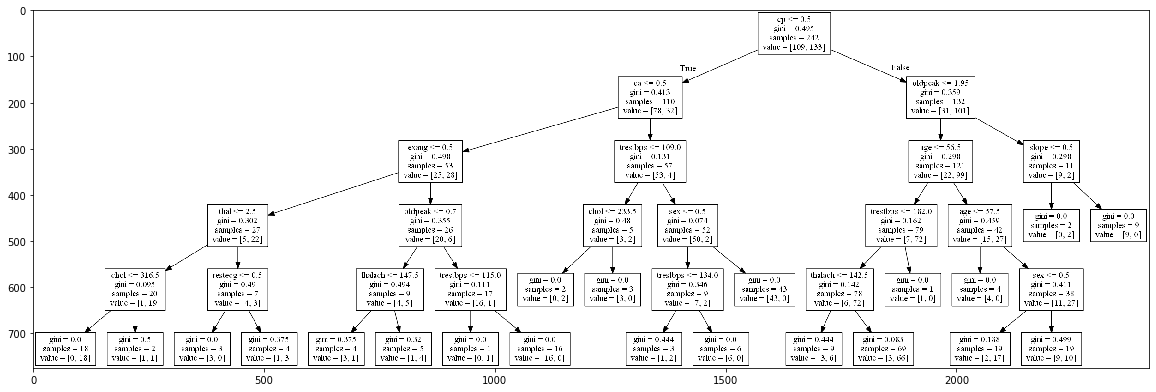

In [12]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree,out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = plt.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)
show_tree(clasificadorArbol, info, 'dec_tree_01.png')

## Interpretación del Arbol de decisión

Los arboles de decisión tratan de predecir algo ya que se han dado una serie de columnas, funciona de forma parecida a dividir y venceras, por lo que trata de planear un resultado con base a la información perteneciente a las columnas que tiene, en este caso se trata de predecir Target usando las columnas que tenemos como age, cp, thal, entre otras.


Para predecirlo, este algoritmo evalua los valores dadas las columnas del conjunto de datos (también suelen ser llamadas features) fijandose una condición respecto a la columna, si cumple la condicion se agrega a un subconjunto que se dispondra al lado izquierdo del nodo, sino se agrega al subconjunto a la derecha del nodo. Luego de esto, se fija en un coeficiente "gini" para saber la pureza del nuevo conjunto.


Cuando el coeficiente "gini" es 0.0 significa que el conjunto de datos por evaluar en esa rama(samples), coincide en su valor objetivo por completo(values). Si es diferente a 0.0, en medida de cuán alto sea, significa que no coinciden sus valores objetivos por lo tanto es posible expandirlo en nuevas ramas. 


Por lo tanto, podemos ver que para cada caso, evalua segun el coeficiente gini si ya se llego a una hoja del arbol o si puede continuar dividiendo su subconjunto de datos y lo continua haciendo de manera recursiva.


Esta opción es ideal para tener una interpretación mas "humana" ya que se busca relacionar los parametros con el objetivo.

# Naive Bayes

Ahora utilizamos los datos ya separados con un modelo Naive Bayes.

In [13]:
gnb = GaussianNB()
clasificadorBayes = gnb.fit(X_train, y_train)
print("La precision para el conjunto de entrenamiento es de: ",clasificadorBayes.score(X_train, y_train))
print("La precision para el conjunto de prueba es de: ", clasificadorBayes.score(X_test, y_test))

La precision para el conjunto de entrenamiento es de:  0.8181818181818182
La precision para el conjunto de prueba es de:  0.8688524590163934


## Matriz de confusión para el modelo Naive Bayes

In [14]:
print("Matriz de confusión en Entrenamiento: ")
print(confusion_matrix(clasificadorBayes.predict(X_train), y_train))
print("Matriz de confusión en Prueba: ")
print(confusion_matrix(clasificadorBayes.predict(X_test), y_test))

Matriz de confusión en Entrenamiento: 
[[ 84  19]
 [ 25 114]]
Matriz de confusión en Prueba: 
[[26  5]
 [ 3 27]]


# Interpretación Naive Bayes

Respecto a este modelo no hay mucho por interpretar, pues internamente su funcionamiento es mas simple y directo. Este modelo da igual peso a todos los "features" y trata de encasillar según su conocimiento adquirido, por lo tanto ve cuales features indican que el target es 1 o 0 y con el que mas coincide, a ese lo asigna.  

# Modelo Red Neuronal

Ahora configuramos una red neuronal para ser entrenada con el DataFrame.


Primeramente escalamos los datos para que funcione correctamente la red neuronal.


In [15]:
lr= 0.001 #learning rate 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

Ahora se establece la funcion de activación logistic que es la funcion sigmoid, el learning_rate_init se aplica dado que el solver es 'adam' y se establece una semilla en el random_state para tener un mejor control del proceso.

In [16]:
clasificadorRed= sk.neural_network.MLPClassifier(activation='logistic', max_iter=1000, hidden_layer_sizes=(4,2),
                                                 learning_rate_init=lr,solver='adam', random_state = semilla)
clasificadorRed.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

##### Ahora vemos la precision y matrices de confusion

In [17]:
print("La precision para el conjunto de entrenamiento es de: ", clasificadorRed.score(X_train, y_train))
print("La precision para el conjunto de prueba es de: ",clasificadorRed.score(X_test, y_test))
print("Matriz de confusión en Entrenamiento: ")
print(confusion_matrix(clasificadorRed.predict(X_train), y_train))
print("Matriz de confusión en Prueba: ")
print(confusion_matrix(clasificadorRed.predict(X_test), y_test))

La precision para el conjunto de entrenamiento es de:  0.8801652892561983
La precision para el conjunto de prueba es de:  0.8688524590163934
Matriz de confusión en Entrenamiento: 
[[ 89   9]
 [ 20 124]]
Matriz de confusión en Prueba: 
[[25  4]
 [ 4 28]]


# Interpretación Red Neuronal

La red neuronal internamente otorga unos pesos a los features, estos pesos se generan en la relación que tienen con el objetivo, por lo tanto estos pesos son los que deciden si una persona sufre problemas de corazón o no, se hace una recolección de los pesos que estan distribuidos en las capas y neuronas y se decide cual sera tu valor objetivo. 

# Comparación de Resultados

Para realizar esta comparación nos basamos en los resultados obtenidos de utilizar la semilla = 42 que se aplica a los random_state.
<br>Los resultados obtenidos para los algoritmos fueron los siguiente:

#### Arbol de Decisión
La precision para el conjunto de entrenamiento es de:  0.9090909090909091
<br>La precision para el conjunto de prueba es de:  0.819672131147541

#### Naive Bayes
La precision para el conjunto de entrenamiento es de:  0.8181818181818182
<br>La precision para el conjunto de prueba es de:  0.8688524590163934

#### Red Neuronal
La precision para el conjunto de entrenamiento es de:  0.8801652892561983
<br>La precision para el conjunto de prueba es de:  0.8688524590163934

## Precisión

Con base a los resultados obtenidos se puede observar que la precisión mas alta para el conjunto de prueba con las configuraciones propuestas, la proporcionan los modelos de Naive Bayes y de Red neuronal pues ambos coinciden en 0.8688524590163934. Aunque en este caso coinciden sus valores, sus resultados son diferentes como se puede observar en la matriz de confusión.

## Estabilidad

Considerando la Estabilidad como la diferencia de precisión entre el conjunto de Entrenamiento y el conjunto de Prueba, se obtiene para cada modelo:

Estabilidad Arbol de Decisión = 0.08941877794336806
<br>Estabilidad Naive Bayes = 0.050670640834575176
<br>Estabilidad Red Neuronal = 0.011312830239804894

Por lo tanto, la mayor estabilidad la ofrece la Red Neuronal, ya que es 3.93% mejor a la estabilidad que Naive Bayes provee y 7.81% mas estable que el Arbol de Decisión.

## Interpretabilidad

En cuanto a Interpretabilidad, el Arbol de Decisión permite un mejor manejo de la información generada, pues es posible graficar su toma de decisiones y ponerla en practica de una forma "tangible", mientras con el modelo de Naive Bayes o de Red Neuronal, el sistema de asignación es una caja negra y no hay forma de conocer cómo se genera un resultado. Por estas razones, el modelo mas interpretable para determinar enfermedades del corazón seria el Arbol de Decisión.  

# Opinion del grupo

En este caso nos inclinamos por elegir el metodo propuesto en la Red Neuronal, pues tiene una gran precisión y muy alta estabilidad, por lo tanto consideramos que nos puede proveer los mejores resultados aunque no tengamos la posibilidad de interpretar la forma en que son analizados los datos que se le proveen.
<br>Cabe resaltar que pueden encontrarse resultados aun mas precisos con la Red Neuronal según la configuración que se decida, en este proyecto decidimos utilizar la mas estable a la que llegamos, descartando así otras con las cuales llegamos a niveles de precisión mejores. 